In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lung_cap = pd.read_csv(r"C:\Croma-Campus-Python-\Data\LungCapData.csv")

In [3]:
lung_cap.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


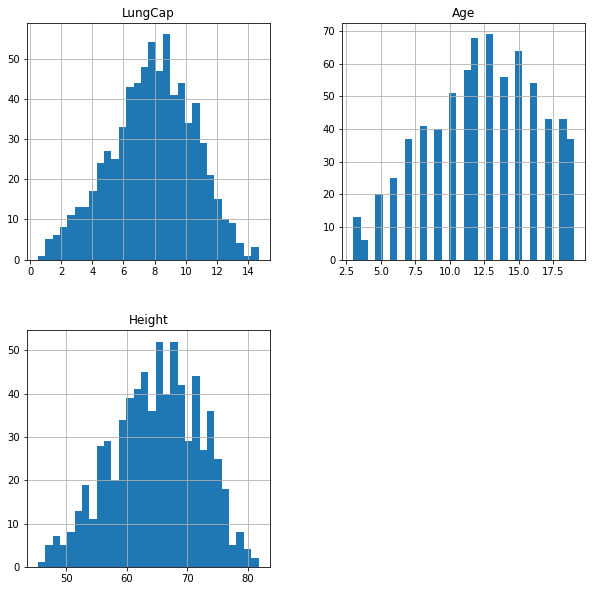

In [4]:
lung_cap.hist(bins = 30, figsize=(10,10));
#plt.show()

In [5]:
lung_cap = pd.get_dummies(lung_cap, prefix = ['Smoke','Gender','Caesarean'])

In [6]:
lung_cap.tail()

,LungCap,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
720,5.725,9,56.0,1,0,1,0,1,0
721,9.050,18,72.0,0,1,0,1,0,1
722,3.850,11,60.5,0,1,1,0,1,0
723,9.825,15,64.9,1,0,1,0,1,0
724,7.100,10,67.7,1,0,0,1,1,0


In [7]:
lung_cap.isna().sum()

LungCap          0
Age              0
Height           0
Smoke_no         0
Smoke_yes        0
Gender_female    0
Gender_male      0
Caesarean_no     0
Caesarean_yes    0
dtype: int64

In [8]:
y = lung_cap.LungCap
x = lung_cap.drop(['LungCap'], axis = 1)

In [9]:
x.head()

,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6,62.1,1,0,0,1,1,0
1,18,74.7,0,1,1,0,1,0
2,16,69.7,1,0,1,0,0,1
3,14,71.0,1,0,0,1,1,0
4,5,56.9,1,0,0,1,1,0


In [10]:
y.head()

0     6.475
1    10.125
2     9.550
3    11.125
4     4.800
Name: LungCap, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [14]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [15]:
y_predict = lin_reg.predict(x_test)

In [16]:
err_train = lin_reg.predict(x_train) - y_train
err_test = lin_reg.predict(x_test) - y_test

In [17]:
mse_train = np.mean(np.square(err_train))
mse_train

1.0086676013714666

In [18]:
mse_test = np.mean(np.square(err_test))
mse_test

1.134520903397914

In [19]:
rsquare = lin_reg.score(x_train,y_train)
rsquare

0.857772819369019

In [20]:
adj_rsquare = 1 - (((1-rsquare)*(len(x_train)-1)/(len(x_train)-8-1)))
adj_rsquare

0.8557801443339089

In [21]:
mape = np.mean(np.abs((err_train/y_train)*100))
mape

13.643226799256254

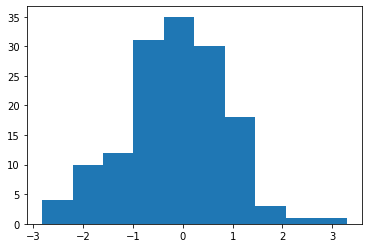

In [22]:
plt.hist(err_test);

In [23]:
import seaborn as sns

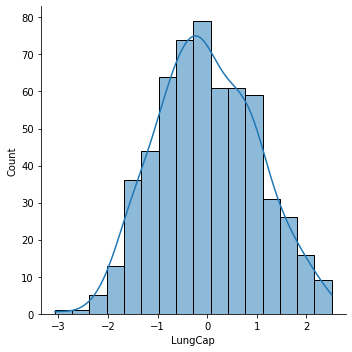

In [24]:
sns.displot(err_train,kde = True);

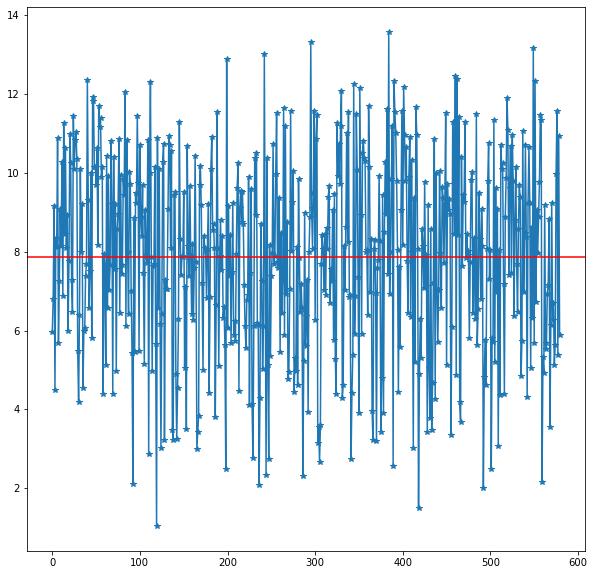

In [155]:
plt.figure(figsize = (10,10))
plt.plot(lin_reg.predict(x_train), marker = '*')
plt.axhline(y = np.mean(y_train), color = 'r')